<a href="https://colab.research.google.com/github/Zeecrow16/waste-classification-nn/blob/main/Waste_Classification_NN_for_Recycle_Me_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Waste.zip to Waste (1).zip


In [ ]:
import zipfile
import io

zf = zipfile.ZipFile(io.BytesIO(uploaded['Waste (1).zip']), "r")
zf.extractall()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

input_folder = 'Waste/'
output_folder = 'Waste/'
splitfolders.ratio(input_folder, output="test-train", seed=42, ratio=(.8, .1, .1))

Copying files: 1855 files [00:00, 2599.60 files/s]


In [ ]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/test-train/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/test-train/val",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/test-train/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1470 files belonging to 4 classes.
Found 183 files belonging to 4 classes.
Found 190 files belonging to 4 classes.


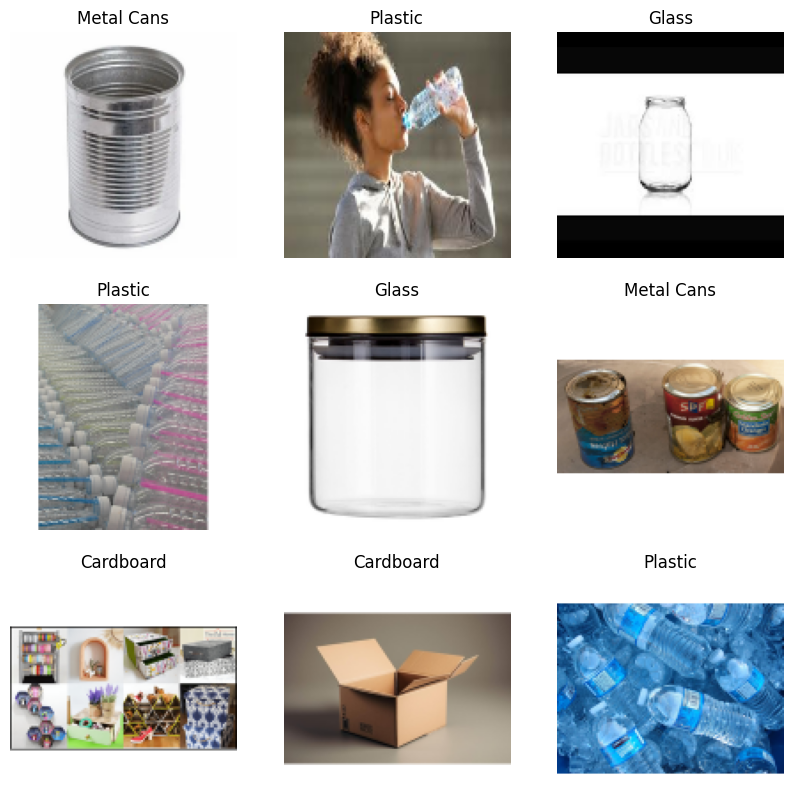

In [ ]:
class_name = ["Cardboard", "Glass", "Metal Cans", "Plastic"]
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(train_ds.class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 477ms/step - accuracy: 0.3990 - loss: 1.3114 - val_accuracy: 0.6831 - val_loss: 0.8842
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 467ms/step - accuracy: 0.6587 - loss: 0.8260 - val_accuracy: 0.6120 - val_loss: 0.9331
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 504ms/step - accuracy: 0.7284 - loss: 0.7180 - val_accuracy: 0.7596 - val_loss: 0.7507
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 500ms/step - accuracy: 0.7769 - loss: 0.5860 - val_accuracy: 0.7869 - val_loss: 0.7381
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 464ms/step - accuracy: 0.8138 - loss: 0.5102 - val_accuracy: 0.8306 - val_loss: 0.6193
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.8410 - loss: 0.4310 - val_accuracy: 0.7923 - val_loss: 0.8075
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 470ms/step - accuracy: 0.8696 - loss: 0.3346 - val_accuracy: 0.8142 - val_loss: 0.8101
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 541ms/step - accuracy: 0.8986 - loss: 0.2828 - val_accu

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8291 - loss: 0.9000


[1.1042025089263916, 0.8157894611358643]

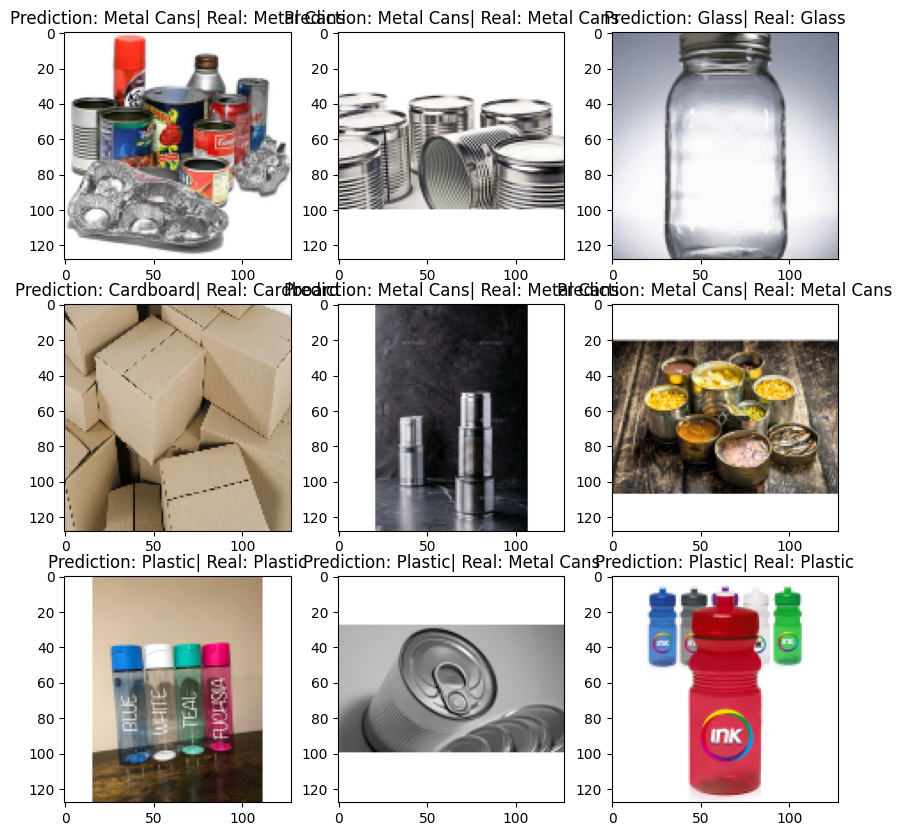

In [ ]:
import numpy

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  classifications = model(images)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Prediction: " + class_name[index] + "| Real: " + class_name[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpjth4ucgy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  135705107349968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107352272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107352464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107353424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107352848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107354384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107354768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107355728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107356112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135705107357072: TensorSpec(shape=(), dtype=tf.resource, name=None)
